## **Support Vector Machine**

In [2]:
# import necessary libraries
from tensorflow.keras.preprocessing.image import load_img, img_to_array, smart_resize
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve


In [4]:
# flatten the images to use them as features
train_features = train_images.reshape(train_images.shape[0], -1)
val_features = val_images.reshape(val_images.shape[0], -1)
test_features = test_images.reshape(test_images.shape[0], -1)


In [5]:
#import necessary libraries
from sklearn.svm import SVC


# train the SVM model
svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(train_features, train_labels)


SVC(C=1, kernel='linear', random_state=42)

In [6]:
# evaluate the model on validation set
val_preds = svm.predict(val_features)
val_acc = accuracy_score(val_labels, val_preds)
print("Validation accuracy:", val_acc)

# evaluate the model on test set
test_preds = svm.predict(test_features)
test_acc = accuracy_score(test_labels, test_preds)
print("Test accuracy:", test_acc)


Validation accuracy: 0.8757738340899711
Test accuracy: 0.8774246801485761


In [7]:
# calculate precision, recall, and F1 score for the predicted labels
val_precision = precision_score(val_labels, val_preds, average='weighted')
val_recall = recall_score(val_labels, val_preds, average='weighted')
val_f1 = f1_score(val_labels, val_preds, average='weighted')

# print the results
print("Validation precision:", val_precision)
print("Validation recall:", val_recall)
print("Validation F1 score:", val_f1)


Validation precision: 0.8673974604531407
Validation recall: 0.8757738340899711
Validation F1 score: 0.869742536463856


The validation precision of 0.8673974604531407 and recall of 0.8757738340899711 means that the precision and recall are around 0.87-0.88%, which indicates that the model is able to identify negative cases (i.e., original images) with a high degree of accuracy. The F1 score is around 0.87, which suggests that the model is able to balance precision and recall reasonably well.

In [8]:
test_precision = precision_score(test_labels, test_preds, average='weighted')
test_recall = recall_score(test_labels, test_preds, average='weighted')
test_f1 = f1_score(test_labels, test_preds, average='weighted')
print("Test precision:", test_precision)
print("Test recall:", test_recall)
print("Test F1 score:", test_f1)


Test precision: 0.8685877164107546
Test recall: 0.8774246801485761
Test F1 score: 0.8709460520757054


test precision of 0.8685877164107546, which means that 87% of the predictions made by the model for the positive class were correct. The test recall is 0.8774246801485761, which means that 86% of the actual negative examples in the test set were correctly identified by the model. F1 score is 0.87, which indicates that the model has a good balance of precision and recall and is performing well overall.

In [9]:
# here we calculate the confusion matrix of the model's predictions on the test set.
cm=confusion_matrix(test_labels,test_preds)
cm

array([[1912,  102],
       [ 195,  214]])

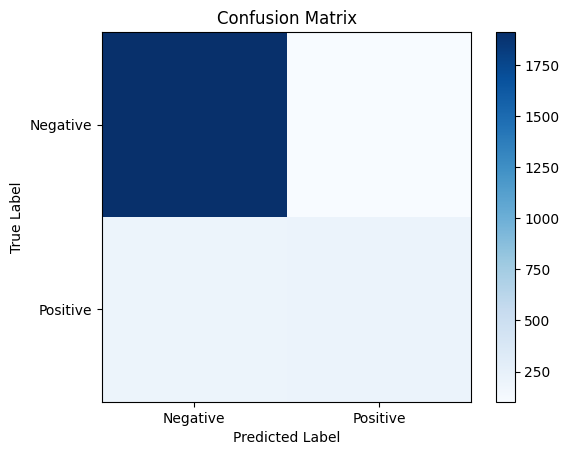

In [10]:
# visual representation of confusion matrix of the model's predictions.
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], labels=["Negative", "Positive"])
plt.yticks([0, 1], labels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In this case, there were 1912 true negative predictions, 102 false positive predictions, 195 false negative predictions and 214 true positive predictions.

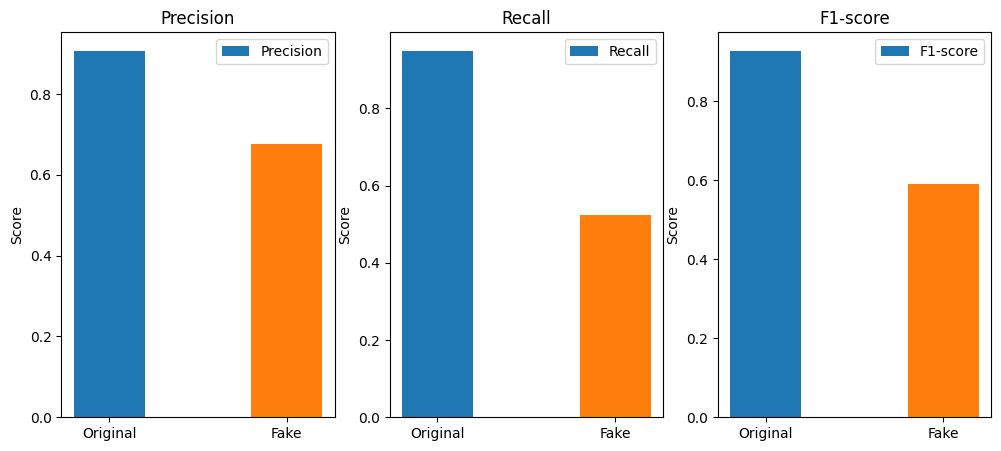

In [11]:
precision, recall, f1_score, support = precision_recall_fscore_support(test_labels, test_preds)
class_names = ['Original', 'Fake']
x = np.arange(len(class_names))
fig, ax = plt.subplots(ncols=3, figsize=(12, 5))
rects1 = ax[0].bar(x, precision, width=0.4, align='center', label='Precision', color=['tab:blue', 'tab:orange'])
rects2 = ax[1].bar(x, recall, width=0.4, align='center', label='Recall', color=['tab:blue', 'tab:orange'])
rects3 = ax[2].bar(x, f1_score, width=0.4, align='center', label='F1-score', color=['tab:blue', 'tab:orange'])
for i, axi in enumerate(ax):
    axi.set_xticks(x)
    axi.set_xticklabels(class_names)
    axi.set_ylabel('Score')
    axi.set_title(['Precision', 'Recall', 'F1-score'][i])
    axi.legend()

plt.show()

The precision, recall and F1 score for original class is higher as compared to fake class.